1. Napisati funkciju kojom se generišu odmjerci LFM signala na intervalu $-T/2$ do $T/2$.

In [1]:
import numpy as np
def diskretni_chirp(T, W, p):
    c=1j*np.pi*W*np.square(np.arange(-T/2,T/2,1/(W*p)))/T
    x=np.exp(c)
    return x

2. Generisati LFM signal sa trajanjem od $100$ $ \mu s$ i frekvencijskim opsegom od $1$ $MHz$. Izabrati
faktor $p$ $=$ $10$. Nacrtati realni i imaginarni dio signala. Smatrati da se radi o kontinualnom signalu
i vremensku osu označiti u sekundama

<IPython.core.display.Javascript object>


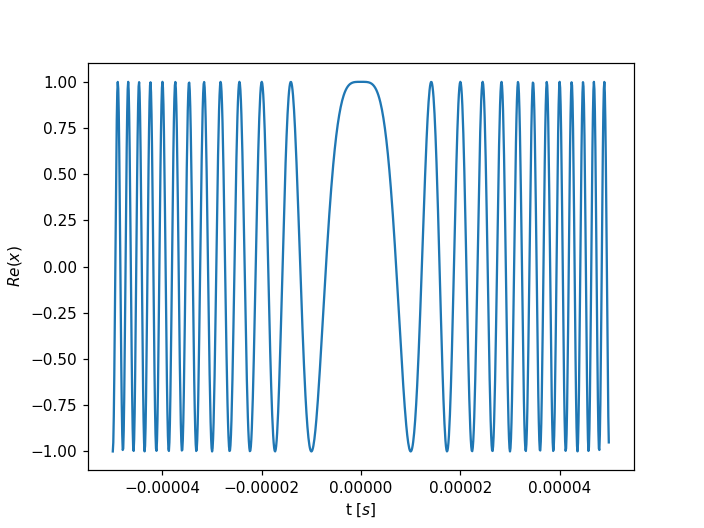

<IPython.core.display.Javascript object>


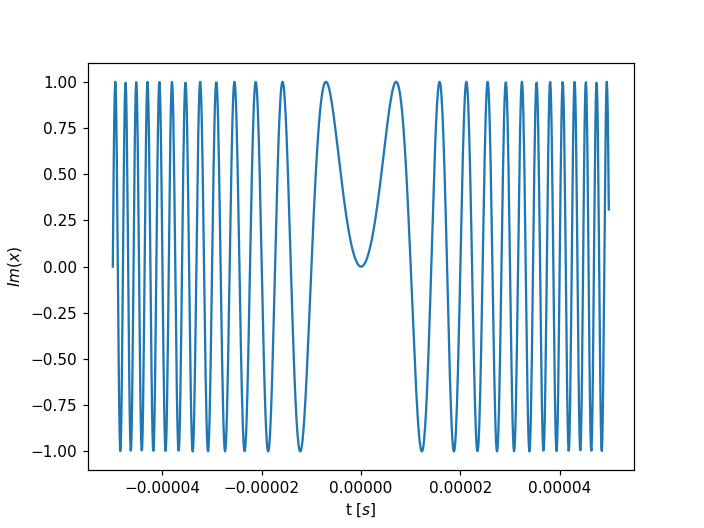

In [2]:
import matplotlib.pyplot as plt
%matplotlib notebook
T=100*10**(-6)
W=10**6
p=10
x=diskretni_chirp(T,W,p)
t=np.arange(-T/2,T/2,1/(W*p))
plt.figure('Realni dio')
plt.ylabel('$Re(x)$')
plt.xlabel('t [$s$]')
plt.plot(t,x.real)

plt.figure('Imaginarni dio')
plt.ylabel('$Im(x)$')
plt.xlabel('t [$s$]')
plt.plot(t,x.imag)

3. Generisati tri LFM signala, svaki sa trajanjem od $100$ $\mu s$, ali sa frekvencijskim opsezima od
$100$ $kHz$, $1$ $MHz$ i $10$ $MHz$. Izaberite faktor $p$ $=$ $1.2$.

In [3]:
T=100*10**(-6)
p=10
W_1=100*10**3
x_1=diskretni_chirp(T,W_1,p)
W_2=10**6
x_2=diskretni_chirp(T,W_2,p)
W_3=10*10**6
x_3=diskretni_chirp(T,W_3,p)

4. Izračunati spektre tri signala iz prethodne tačke. Na istom grafiku nacrtati amplitudne spektre
ovih signala tako da frekvencija $0$ $Hz$ bude u centru grafika. Na frekvencijskoj osi treba da bude
digitalna frekvencija. Obratiti pažnju na normalizaciju spektara tako da se mogu upoređivati.
Odrediti analitički izraz za digitalnu graničnu frekvenciju LFM signala u funkciji njegovih
parametara $T$, $W$ i $p$. Imajući u vidu da spektar LFM signala treba da bude približno
pravougaonog oblika komentarisati kvalitet aproksimacije u zavisnosti od proizvoda $TW$. 


<IPython.core.display.Javascript object>


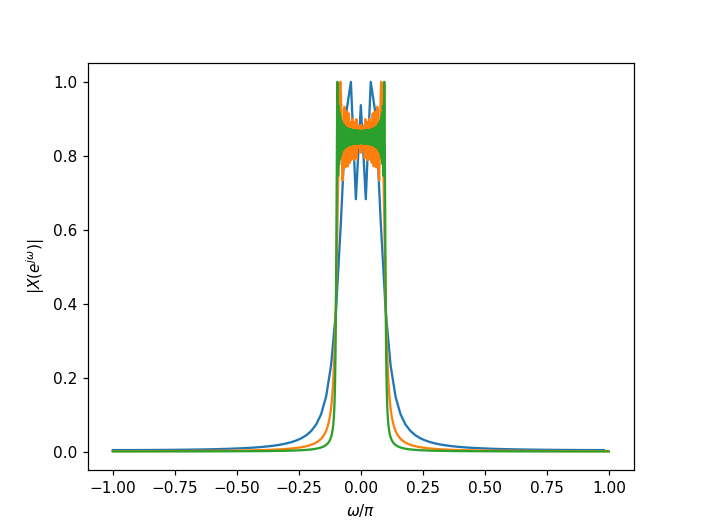

In [4]:
X_1=np.fft.fft(x_1)
X_1=np.fft.fftshift(X_1)
f_1=np.arange(-1,1,2/len(X_1))
plt.figure('Amplitudski spektri')
plt.xlabel(r'$\omega/\pi$')
plt.ylabel('$ |X(e^{j \omega})| $')
plt.plot(f_1,np.abs(X_1)/np.max(np.abs(X_1)))
X_2=np.fft.fft(x_2)
X_2=np.fft.fftshift(X_2)
f_2=np.arange(-1,1,2/len(x_2))
X_3=np.fft.fft(x_3)
X_3=np.fft.fftshift(X_3)
f_3=np.arange(-1,1,2/len(x_3))
plt.plot(f_2,np.abs(X_2)/np.max(np.abs(X_2)))
plt.plot(f_3,np.abs(X_3)/np.max(np.abs(X_3)))

Sa porastom proizvoda $TW$ povećava se nagib bočnih lukova amplitudskog spektra, a samim tim i spektar više teži pravougaonom obliku.

5. Generisati LFM signal sa trajanjem od $100$ $\mu$ $s$ i frekvencijskim opsegom od $1$ $MHz$. Izabrati
faktor $p$ $=$ $10$. Odrediti impulsni odziv usklađenog filtra za ovaj LFM signal. Pretpostavljajući da
je LFM signal primljen nakon što se odbio od cilja na udaljenosti nula, filtrirati ga usklađenim
filtrom. Filtriranje može biti implementirano u vremenskom ili frekvencijskom domenu. Nacrtati
moduo odziva usklađenog filtra. Smatrati da se radi o kontinualnom signalu i vremensku osu
označiti u sekundama.

In [5]:
from scipy import signal
T=100*10**(-6)
W=10**6
p=10
delta=1/(p*W)
x=diskretni_chirp(T,W,p)
h=x**(-1)
y = signal.fftconvolve(h,x)
t = np.arange(-(len(y)//2), len(y)//2+1)*delta

<IPython.core.display.Javascript object>


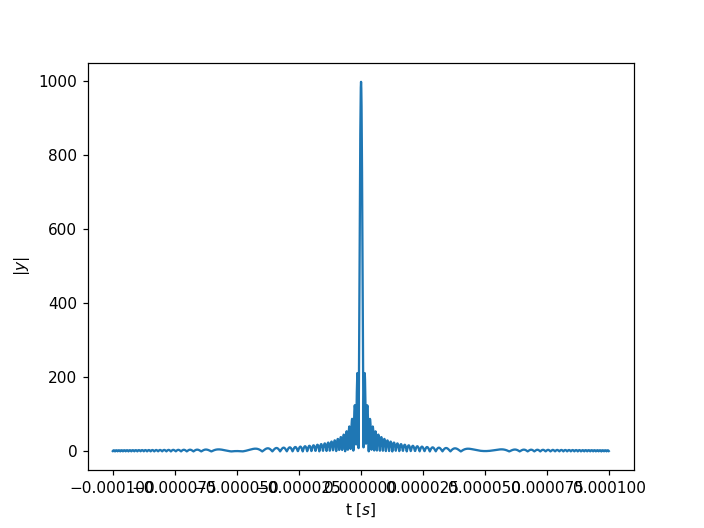

In [6]:
plt.figure('Moduo odziva uskladjenog filtra')
plt.ylabel('$|y|$')
plt.xlabel('t [$s$]')
plt.plot(t,np.abs(y))

6. Generisati signal trajanja $300$ $\mu s$ tako da centralnih $100$ $\mu s$ zauzima LFM signal iz prethodne
tačke, a ostatak signala je jednak nuli. Dodati signalu kompleksni Gausov bijeli šum kod kojeg su
varijanse realne i imaginarne komponente šuma jednake i iznose 5. Koliki je odnos signal-šum u
ovom slučaju? (Vodite računa da se radi o kompleksnim signalima.) Nacrtati realni dio dobijenog
signala. Smatrati da se radi o kontinualnom signalu i vremensku osu označiti u sekundama

In [7]:
T=100*10**(-6)
p=10
W=10**6
p=10
delta=1/(p*W)
x= diskretni_chirp(T,W,p)
h=x**(-1)
N=int(100*10**(-6)//delta)
x=np.concatenate((np.zeros(N),x,np.zeros(N)))


In [8]:
noise=np.random.normal(0, np.sqrt(5), 2*len(x)).view(np.complex128) 
x=x+noise

<IPython.core.display.Javascript object>


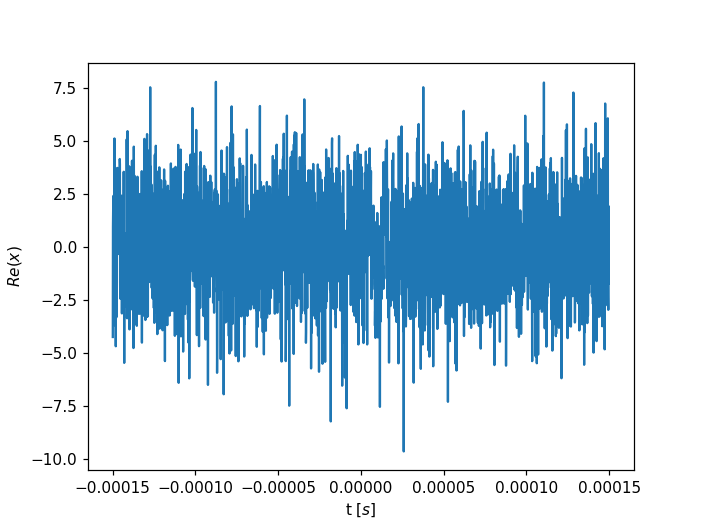

In [9]:
t=np.arange(-len(x)//2,len(x)//2,1)*delta
plt.figure('Realni dio sa sumom')
plt.ylabel('$Re(x)$')
plt.xlabel('t [$s$]')
plt.plot(t,x.real)


Odnos signal šum

In [10]:
P_s=np.sum(np.abs(x)**2)
P_n=np.sum(np.abs(noise)**2)
SNR=10*np.log10(P_s/P_n)
print(SNR)

0.1724721787380828


<IPython.core.display.Javascript object>


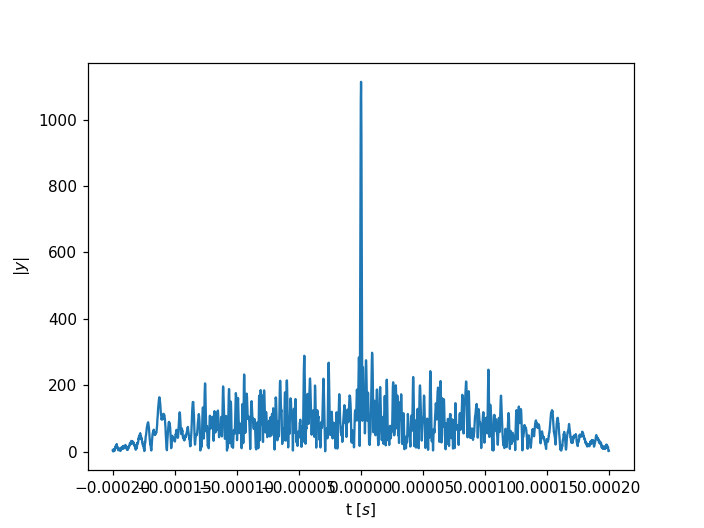

In [11]:
from scipy import constants
y = signal.fftconvolve(h,x)
t=np.arange(-(len(y)//2), len(y)//2+1)*delta
plt.figure('Moduo odziva uskladjenog filtra vrijeme')
plt.ylabel('$|y|$')
plt.xlabel('t [$s$]')
plt.plot(t,np.abs(y))

<IPython.core.display.Javascript object>


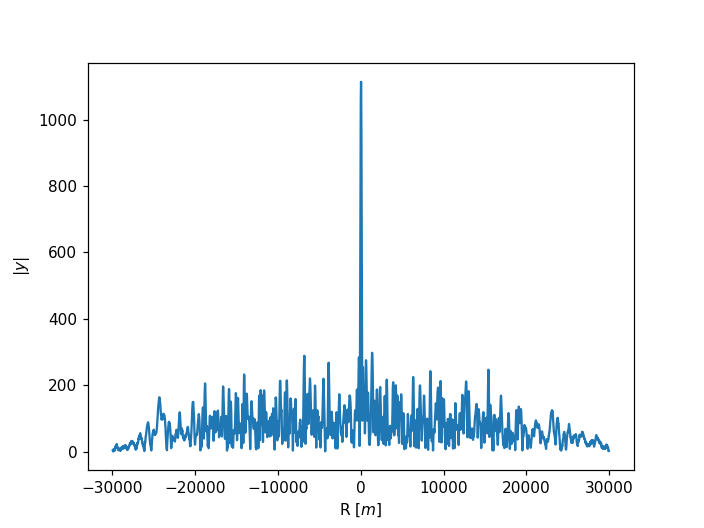

In [12]:
r =constants.speed_of_light*np.arange(-(len(y)//2), len(y)//2+1)*delta/2
plt.figure('Moduo odziva uskladjenog filtra sa sumom')
plt.ylabel('$|y|$')
plt.xlabel('R [$m$]')
plt.plot(r,np.abs(y))

8.Napisati funkciju kojom se generiše povorka LFM impulsa.

In [13]:
def chirp_povorka(T, W, p, PRF, Np):
    temp=diskretni_chirp(T,W,p)
    l=temp.size
    N=int((W*p//PRF))
    x=np.zeros((Np)*N,dtype=complex)
    s=0;
    while s<Np*N:
        x[s:s+l]+=temp
        s=s+N
    return x

9.Generisati povorku LFM impulsa sa sljedećim parametrima: trajanje impulsa $10$ $\mu s$ , frekvencijski
opseg $10$ $MHz$, frekvencija ponavljanja impulsa $10$ $kHz$,      $p$ $=$ $1.2$. Izračunati i nacrtati spektar ove
povorke. Na apscisi treba da bude digitalna frekvencija.

In [14]:
T=10*10**(-6)
W=10*10**6
PRF=10*10**3
p=1.2
Np=10
delta=1/(W*p)
h=diskretni_chirp(T,W,p)**(-1)
x=chirp_povorka(T,W,p,PRF,Np)
X=np.fft.fft(x)
X=np.fft.fftshift(X)
f=np.arange(-1,1,2/len(X))
N=int((W*p//PRF))

<IPython.core.display.Javascript object>


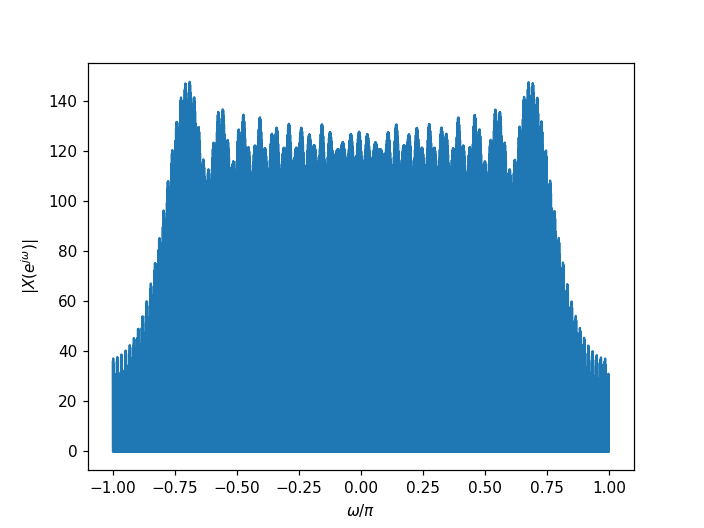

In [15]:
plt.figure("Amplitudska karakteristika povorke LMF impulsa")
plt.xlabel(r'$\omega/\pi$')
plt.ylabel('$ |X(e^{j \omega})| $')
plt.plot(f,np.abs(X))

10. Simulirati Doplerov pomak množenjem povorke LFM impulsa kompleksnom eksponencijalnom funkcijom
$e^{jw_dn}$
, gdje je $w_d$ Doplerov pomak. Izračunati i nacrtati spektar ove povorke za
$w_d = 2\pi/31$. Na apscisi treba da bude digitalna frekvencija. Uporediti dobijeni spektar sa spektrom
iz prethodne tačke. Odrediti minimalni i maksimalni pomak koji se ovako može detektovati.

<IPython.core.display.Javascript object>


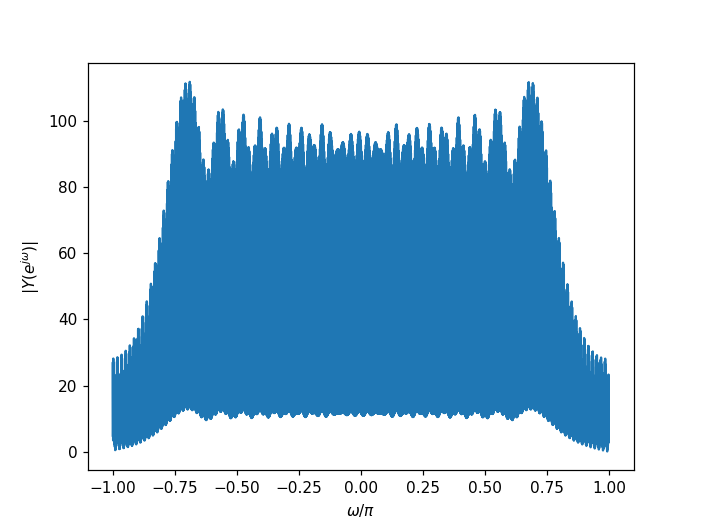

In [16]:
n=1j*np.arange(0,x.size)*(2*np.pi/5000)
e=np.exp(n)
y=e*x
Y=np.fft.fft(y)
Y=np.fft.fftshift(Y)
plt.figure("Amplitudska karakteristika povorke LMF impulsa sa Doplerovim pomakom")
plt.xlabel(r'$\omega/\pi$')
plt.ylabel('$ |Y(e^{j \omega})| $')
plt.plot(f,np.abs(Y))


Kako je spektar diskretnih signala periodičan, povećavanjem frekvencije $w_d$, spektar će se pomjerati udesno. Međutim pomjeranje spektra biće cirkularno (zbog periodicnosti). Samim tim jedino za $|w_d|<\pi$ mozemo biti sigurni koliki je Doplerov pomak. Ukoliko je pomak veći od $\pi$ ne mozemo biti sigurni da li je pomak negativan ili pozitivan,a ni znati koliki je stvarni pomak zbog periodičnosti spektra.

11. Formirati novi signal dobijen tako što se iz svakog impulsa povorke iz tačke 10. uzme po jedan
odmjerak. Dakle, odmjerci se uzimaju sa jednakim razmacima koji odgovaraju periodu
ponavljanja impulsa izraženom u broju odmjeraka. Izračunati i nacrtati spektar tako dobijenog
signala. Objasniti kako se na osnovu ovog spektra može odrediti Doplerov pomak. Povezati
formulu za izračunavanje pomaka na ovaj način sa maksimalnim detektabilnim pomakom koji ste
odredili u tački 10.

<IPython.core.display.Javascript object>


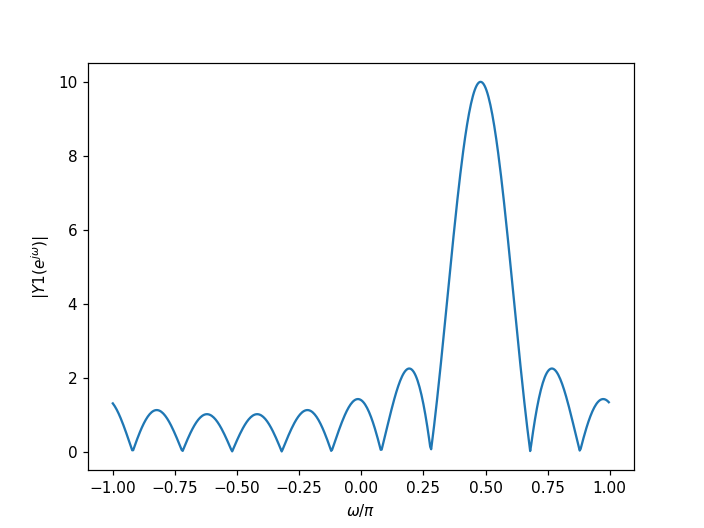

0.0012578642460662258


In [17]:
y1=np.zeros(Np,dtype=complex)

for i in range(0,Np):
    y1[i]=y[i*N]
Y1=np.fft.fft(y1,512)
Y1=np.fft.fftshift(Y1)
f1=np.arange(-1,1,2/len(Y1))
plt.figure("Amplitudska karakteristika odmjerene povorke LMF impulsa sa Doplerovim pomakom")
plt.ylabel('$ |Y1(e^{j \omega})| $')
plt.xlabel(r'$\omega/\pi$')
plt.plot(f1,np.abs(Y1))
print(np.pi*f1[np.argmax(np.abs(Y1))]/N)

$y(n)=x(n)e^{jw_dn}$.<br>
Decimirani signal moze se zapisati kao<br> $y_1(m)=y(mN),$ gdje je N period odmjeravanja, a $m=0,...,N_p-1 $(broj impulsa).<br> A to dalje znaci da je<br>
$y_1(m)=x(mN)e^{jw_dNm}$<br>
Kako je decimiran $x(n)$ odnosno $x(mN)$ pravougaoni impuls duzine $N_p$ ciji je oblik spektar poznat od ranije i koji ima glavni luk u nuli. Na osnovu osobina DFT jasno je da ce onda $y_1(m)$ imati isti oblik spektar pomjeren za $w_d*N$. Medjutim kao i u prethodnom zadatku da bi mogao biti jednoznacno odredjen (da bi se mogli uociti i pozitivni i negativni pomjeraji, te da se ukloni neodređenost zbog periodicnosti), ovaj pomjeraj mora biti manji odnosno $w_dN<\pi$. Sto nas dovodi do uslova da $w_d<\frac{\pi}{N}$. Glavni luk spektra signala $y_1(m)$ bice pomjeren u $w_dN$. Vidimo da je kod ovakvog spektra jednostavnije uociti Doplerov pomak, iz razloga sto je on detektabilan na osnovu glavnog luka spektra decimiranog signala.

12. Da bi se istovremeno odredili i rastojanje i brzina cilja koristi se povorka LFM impulsa koja se
odbija od cilja i u prijemniku se prvo filtrira usklađenim filtrom, a zatim se iz signala na izlazu
usklađenog filtra uzimaju odmjerci kao što je opisano u prethodnoj tački. Filtrirati povorku LFM
impulsa iz tačke 10. odgovarajućim usklađenim filtrom. Formirati novi signal tako što se iz
impulsa u odzivu usklađenog filtra uzme po jedan odmjerak na jednakim razmacima koji
odgovaraju periodu ponavljanja impulsa izraženom u broju odmjeraka. Odmjerke uzimati iz
okoline vrhova odziva usklađenog filtra. Rezultujući signal će biti dugačak onoliko odmjeraka
koliko impulsa se nalazi u povorci. Izračunati i nacrtati spektar tako dobijenog signala. Objasniti
kako se na osnovu ovog spektra može odrediti Doplerov pomak.

<IPython.core.display.Javascript object>


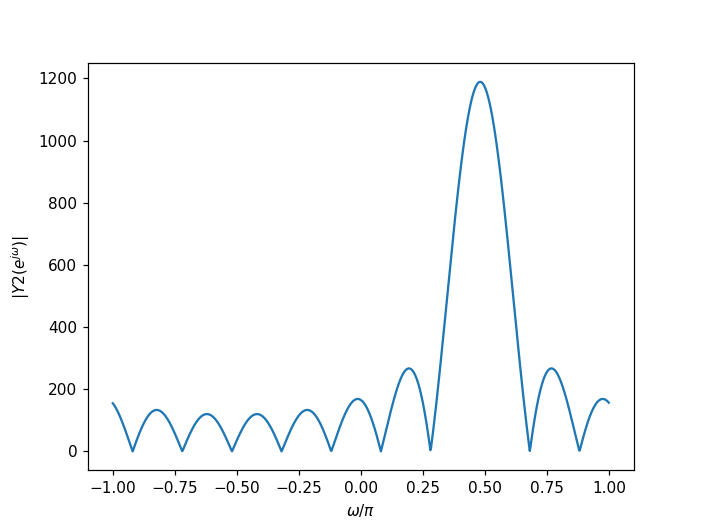

0.0012578642460662258


In [18]:
fil=signal.fftconvolve(y,h,mode='same')
d=np.argmax(fil)
y2=np.zeros(Np,dtype=complex)
for i in range(0,Np):
    y2[i]=fil[d+i*N]
Y2=np.fft.fft(y2,1024)
Y2=np.fft.fftshift(Y2)
f2=np.arange(-1,1,2/len(Y2))
plt.figure("Amplitudska karakteristika odmjerene povorke LMF impulsa sa Doplerovim pomakom2")
plt.xlabel(r'$\omega/\pi$')
plt.ylabel('$ |Y2(e^{j \omega})| $')
plt.plot(f2,np.abs(Y2))
print(np.pi*f2[np.argmax(np.abs(Y2))]/N)

Nakon decimiranja signala propustenog kroz uskladjeni filtar, glavni luk ostaje na istoj digitalnoj frekvenciji kao i kod decimiranog signala koji nije propusten kroz uskladjeni filtar. Samo sto je maksimalna aplituda odnosno vrijednost glavnog luka uvecana. Sto  proizilazi iz cinjenice da smo kao odmjerke uzimali vrijednosti u impulsima odziva uskladjenog filtra.

13. Radar

In [19]:
import scipy.io
import math
d=scipy.io.loadmat("radar_003.mat")

In [20]:
T=d['T'][0]
W=d['W'][0]
PRF=d['PRF'][0]
Fs=d['fs'][0]
Fc=d['fc'][0]
T_out=d['T_out']
p=1.2
Np=20
delta=1/(W*p)
x=chirp_povorka(T,W,p,PRF,Np)
temp=diskretni_chirp(T,W,p)
h=temp**(-1)
X=np.fft.fft(x)
X=np.fft.fftshift(X)
f=np.arange(-1/2,1/2,1/len(X))
N=int((W*p//PRF))

[374.7405725]


<IPython.core.display.Javascript object>


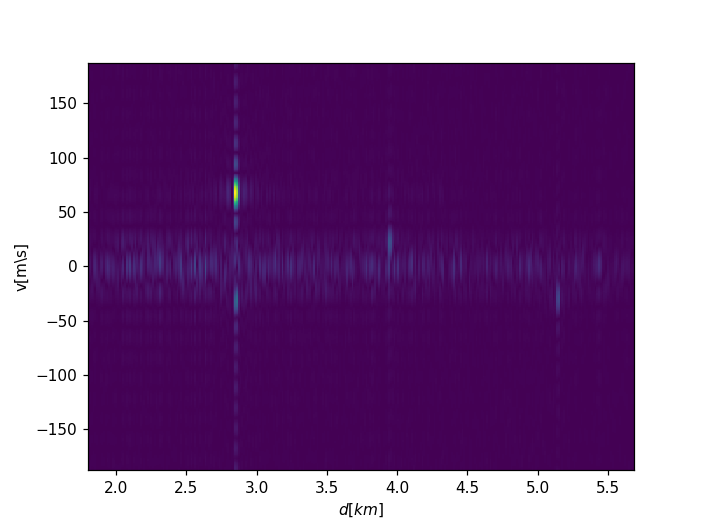

In [21]:
y=d['y'].T 
filtered=np.apply_along_axis(np.convolve,1,y,h,mode='same').T 

dtft=np.empty([len(filtered),512])
for i in range(len(filtered)):
    dtft[i]=abs((np.fft.fftshift(np.fft.fft(filtered[i],512))))

v=Fs*constants.speed_of_light*(np.arange(-1/2,1/2,1/512)/N)/(2*Fc)
R=(1/1000)*constants.speed_of_light*(np.arange(T_out[0,0],T_out[0,1],(T_out[0,1]-T_out[0,0])/len(filtered)))/2
plt.figure('colormesh')
plt.xlabel('$d[km]$')
plt.ylabel('v[m\s]')
plt.pcolormesh(R,v,dtft.T)
